In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

no_show = pd.read_csv('no_show.csv')
clinics = pd.read_csv('clinics.csv')
planning_neighborhoods = pd.read_csv('planning_neighborhoods.csv')
no_show_historical = pd.read_csv('no_show_historical.csv')

print("No Show Columns:", no_show.columns)
print("Clinics Columns:", clinics.columns)
print("Planning Neighborhoods Columns:", planning_neighborhoods.columns)
print("No Show Historical Columns:", no_show_historical.columns)

if 'Clinic Location' in no_show.columns and 'clinic' in clinics.columns:
    data = pd.merge(no_show, clinics, left_on='Clinic Location', right_on='clinic')
    print('Successfully merged now show and clinic')
    print('Data Columns :',data.columns)
else:
    print("Clinic Location column not found in one of the dataframes.")
    data = no_show

if 'Neighborhood' in data.columns and 'neighborho' in planning_neighborhoods.columns:
    data = pd.merge(data, planning_neighborhoods, left_on='Neighborhood', right_on='neighborho')
    print('Successfully merged data and planning_neighborhoods ')
    print('data columns :',data.columns)
else:
    print("Neighborhood column not found in one of the dataframes.")


if 'Patient ID' in data.columns and 'Patient ID' in no_show_historical.columns:
    data = pd.merge(data, no_show_historical, on='Patient ID')
    print('Successfully merged data and no show historical: ')
    print('data colums: ',data.columns)
else:
    print("Patient ID column not found in one of the dataframes.")




No Show Columns: Index(['no_show', 'Patient ID', 'Appointment ID', 'Gender', 'Age',
       'Alcohol Consumption', 'Hypertension', 'Diabetes', 'Appointment Date',
       'Schedule Date', 'Appointment Reason', 'Clinic Location', 'Specialty',
       'Neighborhood'],
      dtype='object')
Clinics Columns: Index(['name', 'type', 'addr1', 'addr2', 'clinic', 'lat', 'long'], dtype='object')
Planning Neighborhoods Columns: Index(['the_geom', 'neighborho'], dtype='object')
No Show Historical Columns: Index(['Patient ID', 'no_show'], dtype='object')
Successfully merged now show and clinic
Data Columns : Index(['no_show', 'Patient ID', 'Appointment ID', 'Gender', 'Age',
       'Alcohol Consumption', 'Hypertension', 'Diabetes', 'Appointment Date',
       'Schedule Date', 'Appointment Reason', 'Clinic Location', 'Specialty',
       'Neighborhood', 'name', 'type', 'addr1', 'addr2', 'clinic', 'lat',
       'long'],
      dtype='object')
Successfully merged data and planning_neighborhoods 
data columns

In [3]:
# Print columns after merge
print("Columns after merging:", data.columns)

Columns after merging: Index(['no_show_x', 'Patient ID', 'Appointment ID', 'Gender', 'Age',
       'Alcohol Consumption', 'Hypertension', 'Diabetes', 'Appointment Date',
       'Schedule Date', 'Appointment Reason', 'Clinic Location', 'Specialty',
       'Neighborhood', 'name', 'type', 'addr1', 'addr2', 'clinic', 'lat',
       'long', 'the_geom', 'neighborho', 'no_show_y'],
      dtype='object')


In [4]:
# Combine no_show_x and no_show_y into a single column
if 'no_show_x' in data.columns and 'no_show_y' in data.columns:
    data['target_no_show'] = data['no_show_x'].fillna(data['no_show_y'])
    print(data)
else:
    raise KeyError("One or both of 'no_show_x' and 'no_show_y' columns not found in the data.")

       no_show_x                            Patient ID  \
0          False  6aed1859-fb9e-455b-b026-5043c8159e40   
1          False  6aed1859-fb9e-455b-b026-5043c8159e40   
2          False  6aed1859-fb9e-455b-b026-5043c8159e40   
3          False  39042c79-f823-4f3f-b8e7-d2e43cf3aa39   
4          False  39042c79-f823-4f3f-b8e7-d2e43cf3aa39   
...          ...                                   ...   
19195      False  3aee3596-605c-415e-bc57-4b79fd582724   
19196      False  3aee3596-605c-415e-bc57-4b79fd582724   
19197      False  1aad9773-3f65-461e-86a3-57be64c5409e   
19198      False  1aad9773-3f65-461e-86a3-57be64c5409e   
19199      False  1aad9773-3f65-461e-86a3-57be64c5409e   

                             Appointment ID Gender  Age Alcohol Consumption  \
0      fa910ce8-ad23-4ebd-ad65-57162a77b44c      M   71             10/week   
1      fa910ce8-ad23-4ebd-ad65-57162a77b44c      M   71             10/week   
2      fa910ce8-ad23-4ebd-ad65-57162a77b44c      M   71           

In [152]:
# Drop the original no_show columns
data.drop(['no_show_x', 'no_show_y'], axis=1, inplace=True)
print(data)

                                 Patient ID  \
0      6aed1859-fb9e-455b-b026-5043c8159e40   
1      6aed1859-fb9e-455b-b026-5043c8159e40   
2      6aed1859-fb9e-455b-b026-5043c8159e40   
3      39042c79-f823-4f3f-b8e7-d2e43cf3aa39   
4      39042c79-f823-4f3f-b8e7-d2e43cf3aa39   
...                                     ...   
19195  3aee3596-605c-415e-bc57-4b79fd582724   
19196  3aee3596-605c-415e-bc57-4b79fd582724   
19197  1aad9773-3f65-461e-86a3-57be64c5409e   
19198  1aad9773-3f65-461e-86a3-57be64c5409e   
19199  1aad9773-3f65-461e-86a3-57be64c5409e   

                             Appointment ID Gender  Age Alcohol Consumption  \
0      fa910ce8-ad23-4ebd-ad65-57162a77b44c      M   71             10/week   
1      fa910ce8-ad23-4ebd-ad65-57162a77b44c      M   71             10/week   
2      fa910ce8-ad23-4ebd-ad65-57162a77b44c      M   71             10/week   
3      b18573af-1297-4b38-8ebe-c2da1aad1a1d      F   47              5/week   
4      b18573af-1297-4b38-8ebe-c2da1aad1

In [5]:
print("Columns after creating target_no_show:", data.columns)
print("Sample rows of target_no_show:\n", data[['target_no_show']].head())

print(data)

Columns after creating target_no_show: Index(['no_show_x', 'Patient ID', 'Appointment ID', 'Gender', 'Age',
       'Alcohol Consumption', 'Hypertension', 'Diabetes', 'Appointment Date',
       'Schedule Date', 'Appointment Reason', 'Clinic Location', 'Specialty',
       'Neighborhood', 'name', 'type', 'addr1', 'addr2', 'clinic', 'lat',
       'long', 'the_geom', 'neighborho', 'no_show_y', 'target_no_show'],
      dtype='object')
Sample rows of target_no_show:
    target_no_show
0           False
1           False
2           False
3           False
4           False
       no_show_x                            Patient ID  \
0          False  6aed1859-fb9e-455b-b026-5043c8159e40   
1          False  6aed1859-fb9e-455b-b026-5043c8159e40   
2          False  6aed1859-fb9e-455b-b026-5043c8159e40   
3          False  39042c79-f823-4f3f-b8e7-d2e43cf3aa39   
4          False  39042c79-f823-4f3f-b8e7-d2e43cf3aa39   
...          ...                                   ...   
19195      False  3ae

In [154]:
# Preprocess data
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})
mapping_dict = {
    '0/week': 0,
    '1/week': 1,
    '5/week': 2,
    '10/week': 3,
    '> 14/week': 4
}
# data['Alcohol Consumption'] = data['Alcohol Consumption'].map({'0/week': 0, '5/week': 1, '> 14/week': 2})
data['Alcohol Consumption'] = data['Alcohol Consumption'].map(mapping_dict)
data['target_no_show'] = data['target_no_show'].astype(int)
data['Hypertension'] = data['Hypertension'].astype(int)
data['Diabetes'] = data['Diabetes'].astype(int)


print(data['Alcohol Consumption'].head())

0    3
1    3
2    3
3    2
4    2
Name: Alcohol Consumption, dtype: int64


In [155]:
# Create age groups
data['age_group'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])
data = pd.get_dummies(data, columns=['age_group'], drop_first=True)

data.head()

,Patient ID,Appointment ID,Gender,Age,Alcohol Consumption,Hypertension,Diabetes,Appointment Date,Schedule Date,Appointment Reason,...,clinic,lat,long,the_geom,neighborho,target_no_show,age_group_30-40,age_group_40-50,age_group_50-60,age_group_>60
0,6aed1859-fb9e-455b-b026-5043c8159e40,fa910ce8-ad23-4ebd-ad65-57162a77b44c,0,71,3,0,0,2021-06-14T10:30:00,2021-03-19T00:00:00,"THERAPEUTIC EXERCISES,Inj ferric carboxymaltos...",...,Mission Bay,37.764124,-122.456572,MULTIPOLYGON (((-122.40876689550858 37.7901633...,Chinatown,0,False,False,False,True
1,6aed1859-fb9e-455b-b026-5043c8159e40,fa910ce8-ad23-4ebd-ad65-57162a77b44c,0,71,3,0,0,2021-06-14T10:30:00,2021-03-19T00:00:00,"THERAPEUTIC EXERCISES,Inj ferric carboxymaltos...",...,Mission Bay,37.784882,-122.438723,MULTIPOLYGON (((-122.40876689550858 37.7901633...,Chinatown,0,False,False,False,True
2,6aed1859-fb9e-455b-b026-5043c8159e40,fa910ce8-ad23-4ebd-ad65-57162a77b44c,0,71,3,0,0,2021-06-14T10:30:00,2021-03-19T00:00:00,"THERAPEUTIC EXERCISES,Inj ferric carboxymaltos...",...,Mission Bay,37.766561,-122.389948,MULTIPOLYGON (((-122.40876689550858 37.7901633...,Chinatown,0,False,False,False,True
3,39042c79-f823-4f3f-b8e7-d2e43cf3aa39,b18573af-1297-4b38-8ebe-c2da1aad1a1d,1,47,2,0,1,2020-03-09T11:45:00,2019-12-19T00:00:00,ROUTINE VENIPUNCTURE,...,Mission Bay,37.764124,-122.456572,MULTIPOLYGON (((-122.45912298496032 37.7082180...,Ocean View,0,False,True,False,False
4,39042c79-f823-4f3f-b8e7-d2e43cf3aa39,b18573af-1297-4b38-8ebe-c2da1aad1a1d,1,47,2,0,1,2020-03-09T11:45:00,2019-12-19T00:00:00,ROUTINE VENIPUNCTURE,...,Mission Bay,37.784882,-122.438723,MULTIPOLYGON (((-122.45912298496032 37.7082180...,Ocean View,0,False,True,False,False


In [156]:
# Drop any remaining non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.head()

,Gender,Age,Alcohol Consumption,Hypertension,Diabetes,lat,long,target_no_show
0,0,71,3,0,0,37.764124,-122.456572,0
1,0,71,3,0,0,37.784882,-122.438723,0
2,0,71,3,0,0,37.766561,-122.389948,0
3,1,47,2,0,1,37.764124,-122.456572,0
4,1,47,2,0,1,37.784882,-122.438723,0


In [157]:
# Print a few rows before splitting
# print("Data before splitting:\n", data.head())
print("Data columns before splitting:", numeric_data.columns)

Data columns before splitting: Index(['Gender', 'Age', 'Alcohol Consumption', 'Hypertension', 'Diabetes',
       'lat', 'long', 'target_no_show'],
      dtype='object')


In [158]:
# Define features and target
if 'target_no_show' in numeric_data.columns:
    X = numeric_data.drop(['target_no_show'], axis=1)
    y = numeric_data['target_no_show']
else:
    raise KeyError("Column 'target_no_show' not found in the data.")

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [160]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
# Define the model
model = RandomForestClassifier(random_state=42, class_weight='balanced')

In [162]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [163]:
 
# Use stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [164]:
# Best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.77109375


In [165]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [166]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2779  687]
 [ 269  105]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      3466
           1       0.13      0.28      0.18       374

    accuracy                           0.75      3840
   macro avg       0.52      0.54      0.52      3840
weighted avg       0.84      0.75      0.79      3840



In [167]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Re-train the model with resampled data
best_model.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_resampled))
print(classification_report(y_test, y_pred_resampled))


[[3111  355]
 [ 309   65]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3466
           1       0.15      0.17      0.16       374

    accuracy                           0.83      3840
   macro avg       0.53      0.54      0.53      3840
weighted avg       0.84      0.83      0.83      3840



In [140]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END m

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [141]:
import joblib

# Save the model
joblib.dump(best_model, 'best_model.pkl')

# Load the model
loaded_model = joblib.load('best_model.pkl')


In [142]:
import joblib

# Load the model
loaded_model = joblib.load('best_model.pkl')


In [146]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler

# Load the model and scaler
loaded_model = joblib.load('best_model.pkl')


# Define a sample input
sample_input = {
    'Gender': 'F',
    'Age': 45,
    'Alcohol Consumption': '5/week',
    'Hypertension': 0,
    'Diabetes': 1,
    'Clinic Location': 'Clinic A',
    'Neighborhood': 'Neighborhood A'
}

# Convert the sample input into a DataFrame
sample_df = pd.DataFrame([sample_input])

# Preprocess the sample input
sample_df['Gender'] = sample_df['Gender'].map({'M': 0, 'F': 1})
sample_df['Alcohol Consumption'] = sample_df['Alcohol Consumption'].map({
    '0/week': 0,
    '1/week': 1,
    '5/week': 2,
    '10/week': 3,
    '> 14/week': 4
})
sample_df['Hypertension'] = sample_df['Hypertension'].astype(int)
sample_df['Diabetes'] = sample_df['Diabetes'].astype(int)

# Create age groups
sample_df['age_group'] = pd.cut(sample_df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])
sample_df = pd.get_dummies(sample_df, columns=['age_group'], drop_first=True)

# Ensure the columns match the training data
# You might need to adjust this based on the actual columns in your model's training data
required_columns = X.columns
sample_df = sample_df.reindex(columns=required_columns, fill_value=0)

# Standardize the input data
sample_data_scaled = scaler.transform(sample_df)

# Make a prediction
prediction = loaded_model.predict(sample_data_scaled)

print("Prediction for the sample input:", prediction[0])


Prediction for the sample input: 0


In [148]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler

# Load the model and scaler
loaded_model = joblib.load('best_model.pkl')
# Ensure you saved and load the scaler if you used it

# Generate multiple sample inputs
samples = [
    {'Gender': 'F', 'Age': 25, 'Alcohol Consumption': '1/week', 'Hypertension': 0, 'Diabetes': 0, 'Clinic Location': 'Clinic A', 'Neighborhood': 'Neighborhood A'},
    {'Gender': 'M', 'Age': 35, 'Alcohol Consumption': '5/week', 'Hypertension': 1, 'Diabetes': 0, 'Clinic Location': 'Clinic B', 'Neighborhood': 'Neighborhood B'},
    {'Gender': 'F', 'Age': 45, 'Alcohol Consumption': '10/week', 'Hypertension': 0, 'Diabetes': 1, 'Clinic Location': 'Clinic C', 'Neighborhood': 'Neighborhood C'},
    {'Gender': 'M', 'Age': 55, 'Alcohol Consumption': '> 14/week', 'Hypertension': 1, 'Diabetes': 1, 'Clinic Location': 'Clinic A', 'Neighborhood': 'Neighborhood A'},
    {'Gender': 'F', 'Age': 65, 'Alcohol Consumption': '0/week', 'Hypertension': 1, 'Diabetes': 0, 'Clinic Location': 'Clinic B', 'Neighborhood': 'Neighborhood B'},
    {'Gender': 'M', 'Age': 75, 'Alcohol Consumption': '5/week', 'Hypertension': 1, 'Diabetes': 1, 'Clinic Location': 'Clinic C', 'Neighborhood': 'Neighborhood C'},
    {'Gender': 'F', 'Age': 85, 'Alcohol Consumption': '1/week', 'Hypertension': 0, 'Diabetes': 0, 'Clinic Location': 'Clinic A', 'Neighborhood': 'Neighborhood A'},
    {'Gender': 'M', 'Age': 40, 'Alcohol Consumption': '10/week', 'Hypertension': 0, 'Diabetes': 1, 'Clinic Location': 'Clinic B', 'Neighborhood': 'Neighborhood B'},
    {'Gender': 'F', 'Age': 30, 'Alcohol Consumption': '0/week', 'Hypertension': 0, 'Diabetes': 0, 'Clinic Location': 'Clinic C', 'Neighborhood': 'Neighborhood C'},
    {'Gender': 'M', 'Age': 50, 'Alcohol Consumption': '5/week', 'Hypertension': 1, 'Diabetes': 0, 'Clinic Location': 'Clinic A', 'Neighborhood': 'Neighborhood A'}
]

# Convert the samples into a DataFrame
samples_df = pd.DataFrame(samples)

# Preprocess the samples
samples_df['Gender'] = samples_df['Gender'].map({'M': 0, 'F': 1})
samples_df['Alcohol Consumption'] = samples_df['Alcohol Consumption'].map({
    '0/week': 0,
    '1/week': 1,
    '5/week': 2,
    '10/week': 3,
    '> 14/week': 4
})
samples_df['Hypertension'] = samples_df['Hypertension'].astype(int)
samples_df['Diabetes'] = samples_df['Diabetes'].astype(int)

# Create age groups
samples_df['age_group'] = pd.cut(samples_df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])
samples_df = pd.get_dummies(samples_df, columns=['age_group'], drop_first=True)

# Ensure the columns match the training data
# Adjust this based on the actual columns in your model's training data
required_columns = X.columns
samples_df = samples_df.reindex(columns=required_columns, fill_value=0)

# Standardize the input data
samples_data_scaled = scaler.transform(samples_df)

# Make predictions
predictions = loaded_model.predict(samples_data_scaled)

# Print the predictions
for i, prediction in enumerate(predictions):
    print(f"Prediction for sample {i+1}: {prediction}")


Prediction for sample 1: 0
Prediction for sample 2: 0
Prediction for sample 3: 0
Prediction for sample 4: 1
Prediction for sample 5: 0
Prediction for sample 6: 0
Prediction for sample 7: 0
Prediction for sample 8: 0
Prediction for sample 9: 1
Prediction for sample 10: 0


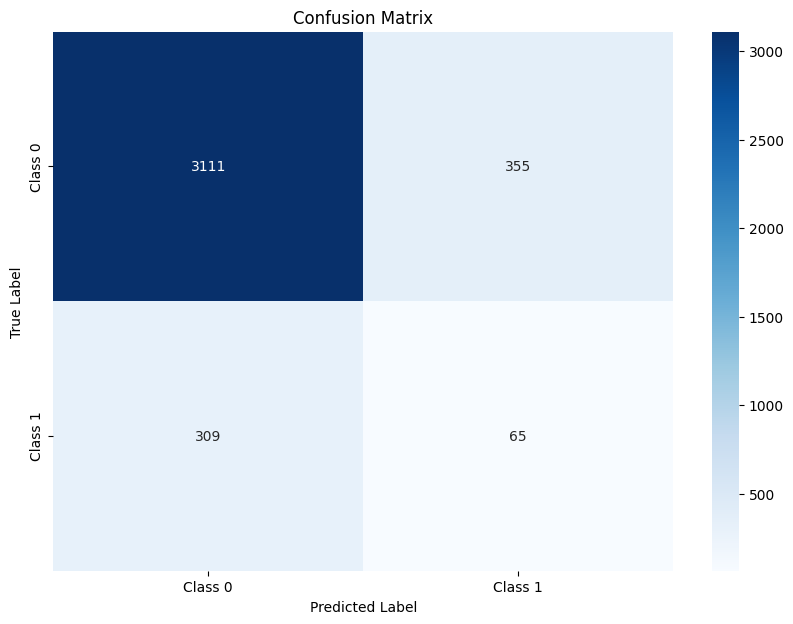

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_resampled)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


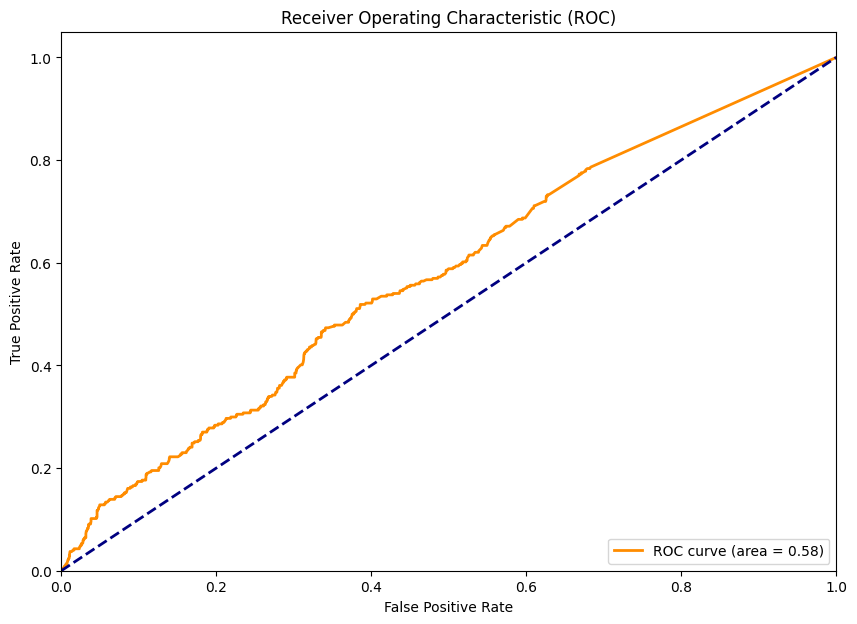

In [169]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


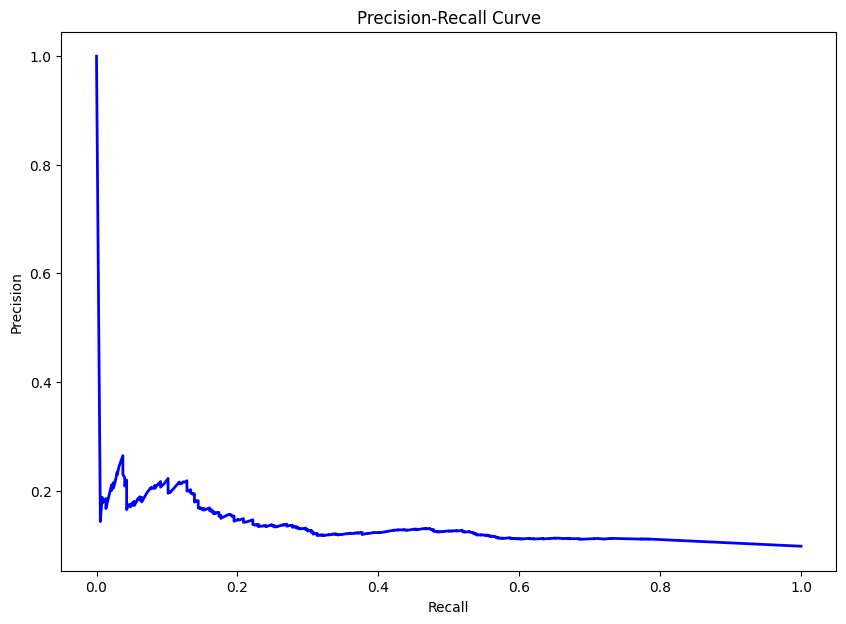

In [170]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:,1])

# Plot Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


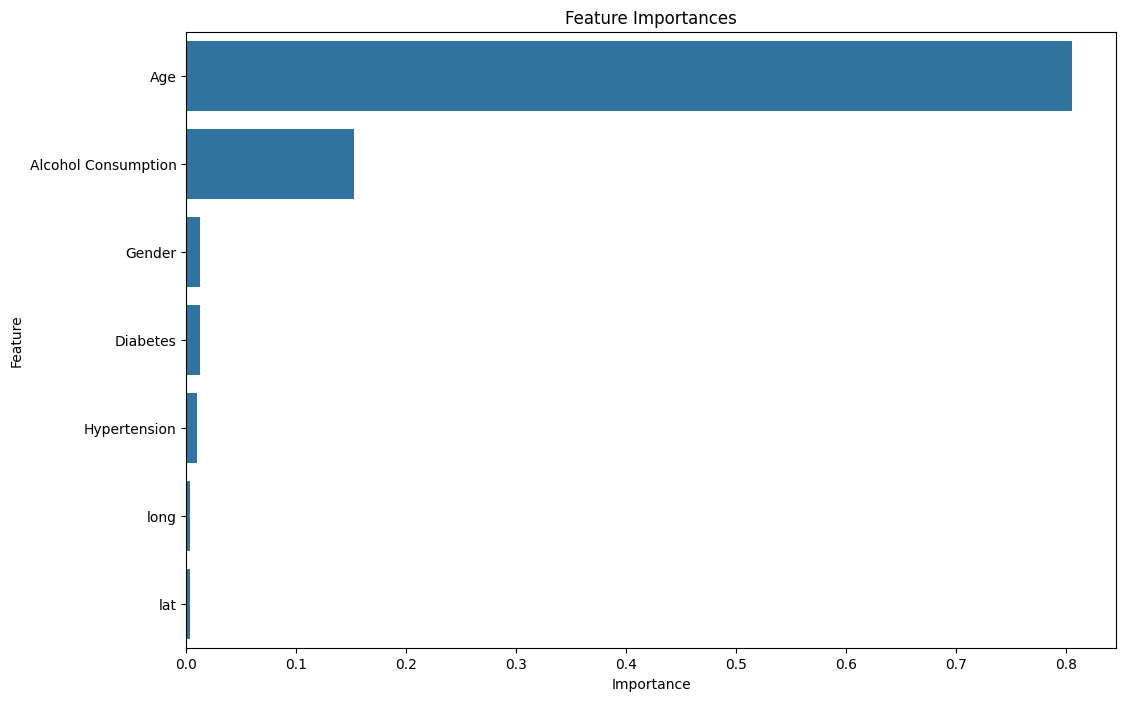

In [171]:
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()
